# LSTM을 사용한 주가예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

In [5]:
res = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400')
res.text

'[{"date":1424304000,"high":244,"low":225,"open":225,"close":244,"volume":46.27631267,"quoteVolume":0.19311748,"weightedAverage":239.62777823},{"date":1424390400,"high":245,"low":240.25,"open":240.25011809,"close":240.25,"volume":55.894897,"quoteVolume":0.23042935,"weightedAverage":242.56847926},{"date":1424476800,"high":245,"low":245,"open":245,"close":245,"volume":14.72223865,"quoteVolume":0.06009077,"weightedAverage":245},{"date":1424563200,"high":249,"low":235,"open":245,"close":235,"volume":129.12124785,"quoteVolume":0.53905499,"weightedAverage":239.53260845},{"date":1424649600,"high":235.001,"low":235,"open":235.00000236,"close":235,"volume":96.56756248,"quoteVolume":0.41092569,"weightedAverage":235.00006166},{"date":1424736000,"high":239.75,"low":235,"open":235,"close":239.75,"volume":149.15439319,"quoteVolume":0.6267487,"weightedAverage":237.98117682},{"date":1424822400,"high":239.75,"low":237.75,"open":239.75,"close":237.75,"volume":221.58409525,"quoteVolume":0.92755033,"weigh

In [7]:
# json()으로 딕셔너리형태로 불러올 수 있음

res.json()

[{'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'close': 244,
  'volume': 46.27631267,
  'quoteVolume': 0.19311748,
  'weightedAverage': 239.62777823},
 {'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'close': 240.25,
  'volume': 55.894897,
  'quoteVolume': 0.23042935,
  'weightedAverage': 242.56847926},
 {'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'close': 245,
  'volume': 14.72223865,
  'quoteVolume': 0.06009077,
  'weightedAverage': 245},
 {'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'close': 235,
  'volume': 129.12124785,
  'quoteVolume': 0.53905499,
  'weightedAverage': 239.53260845},
 {'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'close': 235,
  'volume': 96.56756248,
  'quoteVolume': 0.41092569,
  'weightedAverage': 235.00006166},
 {'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'close': 239.75,
  'volume': 149.15439319,
  'quote

In [9]:
# 데이터 프레임으로 만들기

df= pd.DataFrame(res.json())
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,244.000000,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,240.250000,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,245.000000,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,235.000000,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,235.000000,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2584,1647561600,42308.476004,40150.087581,40908.000000,41754.811660,9.986990e+06,243.314842,41045.544156
2585,1647648000,42375.089534,41512.409770,41755.212916,42205.579078,7.471468e+06,178.279937,41908.630814
2586,1647734400,42275.251821,40919.255124,42196.264992,41250.308283,8.375151e+06,201.834517,41495.136669
2587,1647820800,41531.500846,40500.000000,41260.158661,41000.449464,9.073900e+06,221.057318,41047.723769


In [16]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
close = df_scaled[:,4]

In [17]:
close = list(close)

In [18]:
close

[0.0009693439164567483,
 0.0009136606841575663,
 0.0009841927784031966,
 0.0008357041589387116,
 0.0008357041589387116,
 0.0009062362531843419,
 0.0008765385292914449,
 0.0008876751757512812,
 0.001043588226188991,
 0.0009099493633148862,
 0.001073285950081888,
 0.0013405654651179612,
 0.0013141344907047947,
 0.0015039029465288953,
 0.0011623809036240126,
 0.0012069257075999246,
 0.0012069257851109838,
 0.0012069261680631334,
 0.0012663212345301535,
 0.0016672404279398294,
 0.0014445074988915902,
 0.0014445075153738268,
 0.00143129201294716,
 0.0014311435283368879,
 0.0015352043528575996,
 0.0014296586367966526,
 0.0014296586372421192,
 0.0012379598292164905,
 0.0012788879723597455,
 0.0012597999946426272,
 0.0012543378657217147,
 0.001318542352209373,
 0.0012169265851009066,
 0.0009474493788043338,
 0.001020951357102696,
 0.0009474492695167097,
 0.0011082208675832973,
 0.0010395566975083328,
 0.0010282839497951332,
 0.001123071118640781,
 0.0010486150063751093,
 0.001043588226188991,


In [ ]:
 # 5일 주가로 다음날 주가 예측 
    
# x=[0.0009693439164567483,
#  0.0009136606841575663,
#  0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116,]
 
# y= 0.0009062362531843419,

#  0.0008765385292914449,
#  0.0008876751757512812,
#  0.001043588226188991,
#  0.0009099493633148862,
#  0.001073285950081888,
#  0.0013405654651179612,
#  0.0013141344907047947,
#  0.0015039029465288953,
#  0.0011623809036240126,
#  0.0012069257075999246,
#  0.0012069257851109838,
#  0.0012069261680631334,
#  0.0012663212345301535,
#  0.0016672404279398294,
#  0.0014445074988915902,
#  0.0014445075153738268,
#  0.00143129201294716,
#  0.0014311435283368879,
#  0.0015352043528575996,
#  0.0014296586367966526,
#  0.0014296586372421192,
#  0.0012379598292164905,
#  0.0012788879723597455,
#  0.0012597999946426272,
#  0.0012543378657217147,
#  0.001318542352209373,

In [21]:
window_size = 10
X = []
Y = []

for i in range(len(close)-window_size):  # y값 6부터니깐 전체길이에서 5를 뺴줘야함
    
    X.append([close[i+j] for j in range(window_size)]) # j= 0부터 9 ->10일치 주가
    Y.append(close[window_size + i]) # window_size값 이후의 주가
    



In [22]:
X = np.array(X)
Y = np.array(Y)

In [23]:
X.shape

(2579, 10)

In [24]:
train_test_split = 2000

x_train = X[:2000]
y_train = Y[:2000]

x_test = X[2000:]
y_test = Y[2000:]

In [25]:
x_train.shape

(2000, 10)

In [26]:
x_test.shape

(579, 10)

In [27]:
# 3차원입력 : (n_sample, time_steps, n_features) why?

x_train = np.reshape(x_train, (2000,10,1))
x_test = np.reshape(x_test, (579,10,1))

In [28]:
model = Sequential()
model.add(LSTM(100,input_shape=(10,1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear')) # 노드값 그대로 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mse',optimizer='adam')

In [30]:
model.fit(x_train, y_train, epochs=20, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/20
200/200 [==============================] - 3s 7ms/step - loss: 3.0762e-04 - val_loss: 0.0018
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 1.0186e-04 - val_loss: 0.0021
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 1.0104e-04 - val_loss: 0.0021
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 8.8215e-05 - val_loss: 0.0028
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 7.5479e-05 - val_loss: 0.0047
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 5.9988e-05 - val_loss: 0.0055
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 6.7359e-05 - val_loss: 0.0026
Epoch 8/20
200/200 [==============================] - 1s 4ms/step - loss: 6.9237e-05 - val_loss: 0.0071
Epoch 9/20
200/200 [==============================] - 1s 4ms/step - loss: 5.9109e-05 - val_loss: 0.0031
Epoch 10/20
200/200 [==============================] - 1s 4ms/st

In [34]:
# predict

x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [35]:
x_train_pred 

array([[0.00177418],
       [0.0018395 ],
       [0.00202201],
       ...,
       [0.17230886],
       [0.17162275],
       [0.16912103]], dtype=float32)

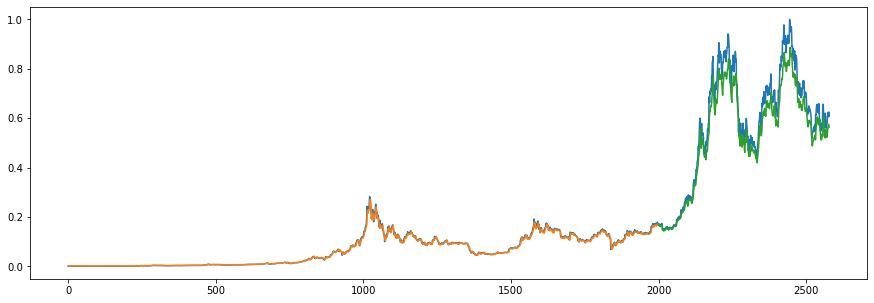

In [44]:
plt.figure(figsize=(15,5))
plt.plot(close[window_size:])
plt.plot(x_train_pred)
plt.plot(np.arange(2000,2000+579), x_test_pred)

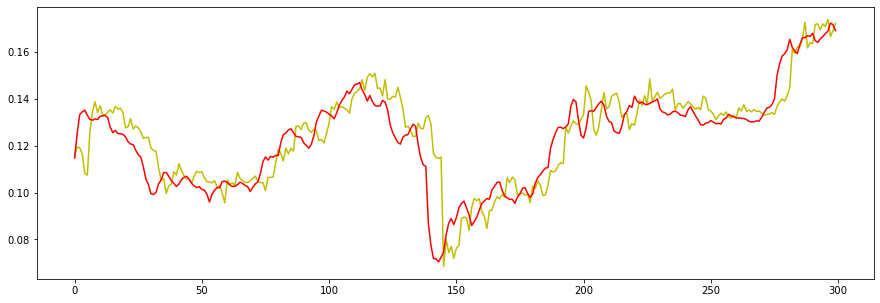

In [46]:
plt.figure(figsize=(15,5))

plt.plot(close[window_size:2003][-300:], color='y')
plt.plot(x_train_pred[-300:], color='r')

In [47]:
import FinanceDataReader as fdr